In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sds = pd.read_csv('../data/SDS_1_678.csv')

In [3]:
sds

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode
0,SDS 381: How to Avoid Failing at Digital Trans...,60 minutes,BusinessData Science,"Podcast Guest: Tony SaldanhaWednesday Jul 08, ...","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ..."
1,SDS 061: Discovering Data Science workflows an...,62 minutes,Machine LearningData SciencePython,Podcast Guest: Daniel WhitenackThursday Jun 15...,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...
2,SDS 049: Great tips on building a successful A...,65 minutes,BusinessDatabase,"Podcast Guest: Jim HadleyThursday May 04, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 49 with Founde...
3,"SDS 029: AI in Recruitment, Machine Learning, ...",66 minutes,BusinessMachine LearningData ScienceArtificial...,"Podcast Guest: Ben TaylorFriday Feb 24, 2017","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill:\tThis is episode number 29, with Chief..."
4,SDS 254: Two Wolves,6 minutes,Data Science,"Podcast Guest: Kirill EremenkoFriday Apr 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ..."
...,...,...,...,...,...,...
673,SDS 293: True Personalization Through Reinforc...,61 minutes,Machine LearningData ScienceArtificial Intelli...,"Podcast Guest: Peyman HesamiWednesday Sep 04, ...","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode 293 with Dat...
674,SDS 299: Becoming Seasoned At Failure,69 minutes,BusinessData Science,"Podcast Guest: Michelle KeimWednesday Sep 25, ...","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is Episode Number 299 w...
675,SDS 271: Making the Public Graphically Literate,65 minutes,Data ScienceData Visualization,"Podcast Guest: Alberto CairoWednesday Jun 19, ...","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 271 w...
676,"SDS 363: Intuition, Frameworks, and Unlocking ...",58 minutes,BusinessData Science,"Podcast Guest: Piyanka JainWednesday May 06, 2020","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 363 w...


In [4]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   episode_name     678 non-null    object
 1   length_episode   678 non-null    object
 2   context_episode  678 non-null    object
 3   guest_name       678 non-null    object
 4   guest_info       678 non-null    object
 5   text_episode     676 non-null    object
dtypes: object(6)
memory usage: 31.9+ KB


In [5]:
sds['episode_number'] = sds['episode_name'].str.split(':', expand = True)[0]
sds['episode_name'] = sds['episode_name'].str.split(':', expand = True)[1]

In [6]:
sds['guest_name'] = sds['guest_name'].str.split(':', expand = True)[1]

In [7]:
sds['length_episode'] = sds['length_episode'].str.split(' ', expand = True)[0]

In [8]:
sds['guest_info'].loc[0]

'Subscribe on Website, Apple Podcasts, Spotify, Stitcher Radio or TuneInTony Saldanha offers insights important for anyone at any point in their data science career. We explore the industrial revolutions, how COVID-19 has changed the world through digital transformation, why digital transformation can fail, tips for execs, and a lot more.About Tony SaldanhaTony was previously VP in Global IT and Shared Services - a multi-billion dollar operation at Procter & Gamble. He\'s now the CEO of Transformant a high-end advisory firm on digital strategy. He\'s based in Cincinnati, Ohio. Tony\'s book, "Why Digital Transformations Fail" releases this month globally. It\'s ranked No.1 on Amazon\'s Hot New Release Category for Organizational Change. \nDuring a 27-year career at Procter & Gamble, Tony Saldanha ran IT and Global Business Services (GBS) in every region of the world, helping create a multi-billion dollar best-in-class operation. Tony has a proven track record of Global Business Services

In [19]:
sds

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number
0,How to Avoid Failing at Digital Transformation,60,BusinessData Science,"Tony SaldanhaWednesday Jul 08, 2020","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ...",SDS 381
1,Discovering Data Science workflows and the im...,62,Machine LearningData SciencePython,"Daniel WhitenackThursday Jun 15, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...,SDS 061
2,Great tips on building a successful Analytics...,65,BusinessDatabase,"Jim HadleyThursday May 04, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 49 with Founde...,SDS 049
3,"AI in Recruitment, Machine Learning, and wher...",66,BusinessMachine LearningData ScienceArtificial...,"Ben TaylorFriday Feb 24, 2017","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill:\tThis is episode number 29, with Chief...",SDS 029
4,Two Wolves,6,Data Science,"Kirill EremenkoFriday Apr 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ...",SDS 254
...,...,...,...,...,...,...,...
673,True Personalization Through Reinforcement Le...,61,Machine LearningData ScienceArtificial Intelli...,"Peyman HesamiWednesday Sep 04, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode 293 with Dat...,SDS 293
674,Becoming Seasoned At Failure,69,BusinessData Science,"Michelle KeimWednesday Sep 25, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is Episode Number 299 w...,SDS 299
675,Making the Public Graphically Literate,65,Data ScienceData Visualization,"Alberto CairoWednesday Jun 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 271 w...,SDS 271
676,"Intuition, Frameworks, and Unlocking the Powe...",58,BusinessData Science,"Piyanka JainWednesday May 06, 2020","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 363 w...,SDS 363


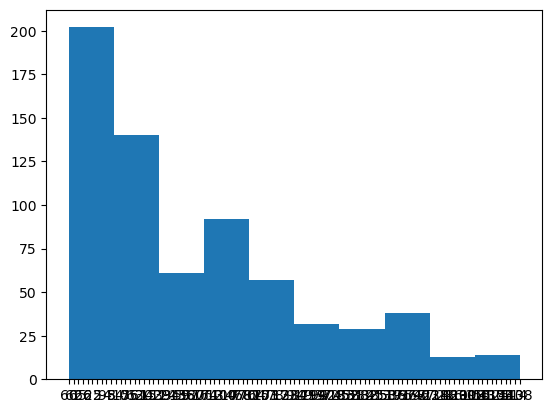

In [13]:
plt.hist(sds['length_episode'], bins = 10);

In [18]:
sds.columns

Index(['episode_name', 'length_episode', 'context_episode', 'guest_name',
       'guest_info', 'text_episode', 'episode_number'],
      dtype='object')

In [25]:
sds['length_episode'].value_counts().head(10)

6     40
7     37
5     32
8     32
10    25
4     22
3     19
64    19
9     18
61    18
Name: length_episode, dtype: int64

In [26]:
sds['context_episode'].unique()

array(['BusinessData Science', 'Machine LearningData SciencePython',
       'BusinessDatabase',
       'BusinessMachine LearningData ScienceArtificial IntelligenceDeep Learning',
       'Data Science', 'Machine LearningPythonDatabase',
       'Data ScienceArtificial Intelligence', 'Blockchain', 'Business',
       'Uncategorized',
       'BusinessData ScienceArtificial IntelligenceCareer Tips',
       'Life PhilosophyData Science',
       'BusinessMachine LearningData ScienceArtificial Intelligence',
       'Machine LearningData Science',
       'BusinessMachine LearningData SciencePython', 'Machine Learning',
       'BusinessData ScienceArtificial Intelligence',
       'BusinessData ScienceCareer Tips',
       'Machine LearningData ScienceArtificial Intelligence',
       'Data ScienceTableauData Visualization',
       'Data ScienceProductivity', 'Data ScienceData Visualization',
       'Data ScienceDeep Learning', 'Database', 'Data ScienceCareer Tips',
       'Machine LearningData Scie